<center><strong>Decision Tree project</strong></center>
<center> IA301 - Logics and Symbolic AI : knowledge representation and reasoning 
(Year 2023-2024)<center>
<h4>Student Group: Pascal Mahé, Léo Barberis, Frédéric Lauron, Pierre de La Ville Montbazon, Anaële Baudant-Cojan<h4>

<center>Project Supervisor: Isabelle BLOCH <email>isabelle.bloch@telecom-paris.fr<email><center><h4>

In [1]:
# This practial work on decision trees uses https://scikit-learn.org/stable/modules/tree.html

import sklearn 
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

# to get the documentation: use help(tree.DecisionTreeClassifier)


In [2]:
# A very simple example, with two examples X, each in one class y:
clf = tree.DecisionTreeClassifier()
X = [[0, 0], [1, 1]]
y = [0, 1]
#Tree construction
clf = clf.fit(X, y)
# Class prediction for a new example
clf.predict([[2., 2.]])

array([1])

[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

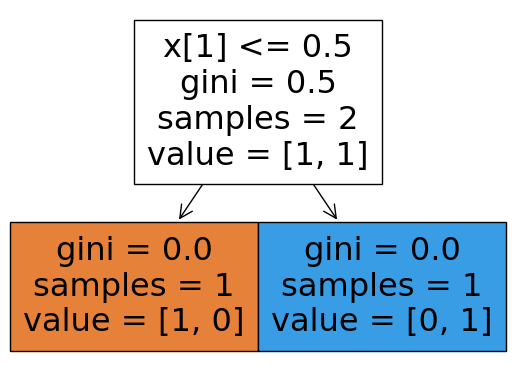

In [3]:
# display of the tree
tree.plot_tree(clf, filled=True)

In [4]:
# Question 1: What is the node test used to build the tree? Explain the prediction for the new sample.


print("Here the second attribute is >= to 0.5 : ",clf.predict([[0.3, 0.6]]))
print("Here the second attribute is < to 0.5 : ",clf.predict([[0.3, 0.5]]))



Here the second attribute is >= to 0.5 :  [1]
Here the second attribute is < to 0.5 :  [0]


Question 1 : 
<br>

Le test utilisé pour construire l'arbre est le test sur le GINI index, pour chaque noeud possible, on applique la formule suivante : 
$ GINI(t) = 1 − \sum_{j}p(j | t)²$ , avec $p(j | t)$ la fréquence relative de la classe j (ici 0 ou 1) qui permet de déterminer la répartition des individus de la classe cible par rapport à l'attribut. Un indice GINI de 0 est optimal puisque les individus sont directement répartis dans leur classes respectives. (on parle d'une node pure), un indice de 1 signifie que l'attribut n'a aucun effet sur la classification. On peut voir qu'ici son utilisation mène à un arbre où on considère uniquement le second attribut, ce qui est suffisant pour la classification.

Pour la prédiction du nouvel individu, on commence par regarder la valeur du second attribut, comme précisé sur le graphe ci-dessus, on observe si celui-ci est supérieur ou égale à 0.5, et on détermine son Y en fonction, ici 1.

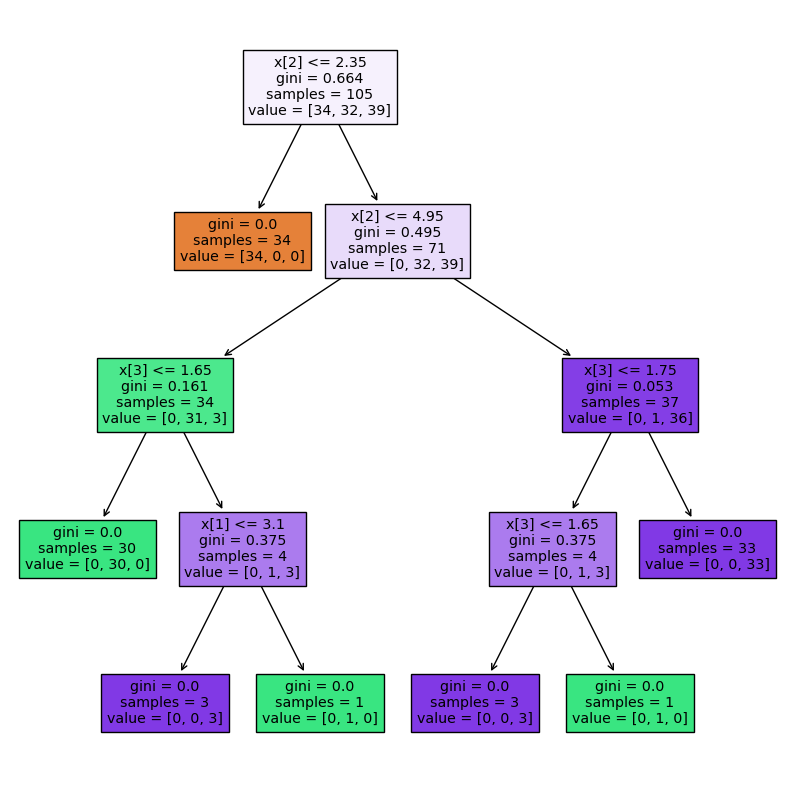

In [4]:
# A more complex example: Iris data (150 samples of 3 types of iris, characterized by 4 attributes) 
# See https://archive.ics.uci.edu/ml/datasets/Iris

X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

In [5]:
# prediction on the test set and computation of the accuracy

clf.predict(X_test)
clf.score(X_test, y_test)


0.9777777777777777

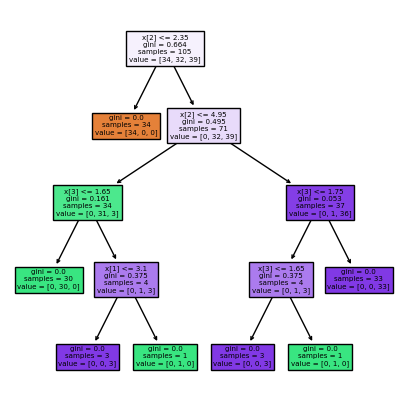

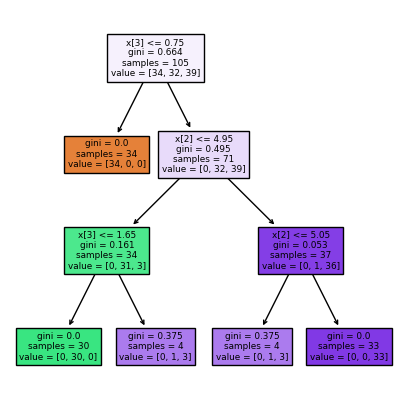

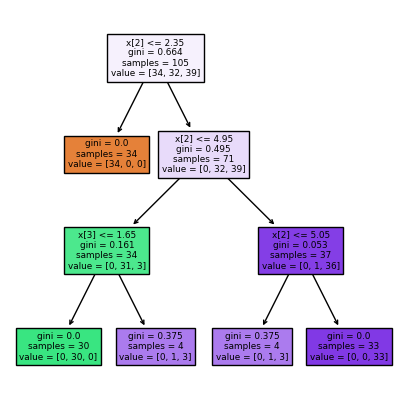

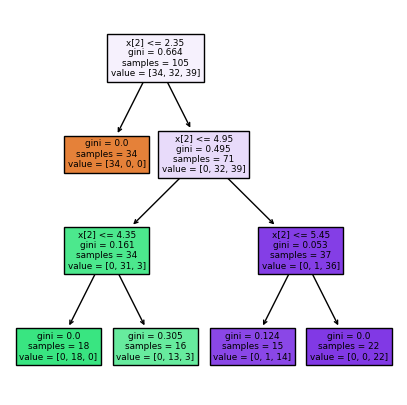

ValueError: X has 4 features, but DecisionTreeClassifier is expecting 2 features as input.

In [6]:
# A more complex example: Iris data (150 samples of 3 types of iris, characterized by 4 attributes) 
# See https://archive.ics.uci.edu/ml/datasets/Iris

X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf_base = tree.DecisionTreeClassifier()

clf_min_samples = tree.DecisionTreeClassifier(min_samples_split=15)
clf_max_depth = tree.DecisionTreeClassifier(max_depth=3)
clf_min_leaf = tree.DecisionTreeClassifier(min_samples_leaf=15)

clf_base.fit(X_train, y_train)

clf_min_samples.fit(X_train, y_train)
clf_max_depth.fit(X_train,y_train)
clf_min_leaf.fit(X_train,y_train)

display
plt.figure(figsize=(5,5)) 
tree.plot_tree(clf_base,filled=True) 
plt.show()

plt.figure(figsize=(5,5)) 
tree.plot_tree(clf_min_samples,filled=True) 
plt.show()

plt.figure(figsize=(5,5)) 
tree.plot_tree(clf_max_depth,filled=True) 
plt.show()
plt.figure(figsize=(5,5)) 
tree.plot_tree(clf_min_leaf,filled=True) 
plt.show()


clf.predict(X_test)
print("Base model accuracy :",clf_base.score(X_test, y_test))
print("clf_min_samples accuracy =",clf_min_samples.score(X_test, y_test))
print("clf_max_depth accuracy =",clf_max_depth.score(X_test, y_test))
print("clf_min_leaf accuracy =",clf_min_leaf.score(X_test, y_test))

In [7]:
# Question 2: change the initial splitting of the dataset by reducing the size of the training set. 
# What do you observe on the tree? on the accuracy?

# Question 3: clf = tree.DecisionTreeClassifier() uses default parameters (Gini criterion, no limit on max_depth...). 
# Change the max_depth parameter, the min_samples_leaf parameter, and others if enough time.
# Conclusion?





**Question 2 :**
<br>
Précision (accuracy) obtenue en réduisant la taille du training set :
(% du dataset affecté au training set)
<br>
- 70% : 0.97 (base)
- 50% : 0.96
- 30% : 0.94
- 10% : 0.94
- 5%  : 0.88, 0.6,0.5 (différents essais)

<br>
En réduisant la taille du training set, nous constatons que le nombre de noeuds dans l'arbre diminue, mais la précision, elle, reste très bonne. Cela signifie que nous pouvons avoir un arbre plus optimisé en utilisant moins de données sans pour autant significativement perdre en précision. Cependant, dans des cas extrêmes comme 5%, il est possible d'obtenir une bonne précision (88%), mais la variance d'un résultat à l'autre est trop élevé pour que la méthode soit viable (88%, 60%, 50%).
<br>




**Question 3 :**
<br>
<br>
En changeant le paramètre "criterion", on observe que GINI logloss et entropy donnent le même résultat (arbre). Ceci est logique pour nos données simples analysées ici, puisque bien que les formules de calcul de ces valeurs soient différentes, elles représentent la même information (la pureté d'une node).
<br>
<br>
Lorsqu'on change le paramètre max_depth, on force l'algorithme a créer un arbre ne pouvant contenir qu'un nombre limité de nodes, ce qui logiquement diminue sa précision. En effet chaque niveau de l'arbre représente une décision pour repartir la donnée. Mais nous observons que dans ce cas-ci, en utilisant une valeur de 3, c'est à dire 3 niveaux maximum après la racine, on conserve la même précision de 0.97 que l'arbre de base qui lui possède 4 niveaux après la racine. On en déduit, qu'il est possible de limiter ce paramètre sans pour autant avoir un impact trop fort sur nos résultats.
<br>
<br>
Le paramètre min_sample_leaf, lui permet de spécifier le nombre minimum d'échantillons requis pour qu'une node puisse être considéré comme une feuille de l'arbre. Là encore, en modifiant sa valeur, on simplifie l'arbre mais on conserve une bonne précision, pour une valeur de 15, on a une précision de 0.91 en sortie.
<br>
<br>
**Pour conclure**, l'arbre de décision est un outil robuste pouvant être adapté selon les caractéristiques comme le volume de données disponibles. Même en optimisant pour réduire la complexité de l'arbre obtenu, la précsion reste convenable. La versatilité offerte par ce paramétrage permettra certainement de s'adapter à des problèmes souvent rencontrés en apprentissages sur données de taille plus importante. Dans un cas où la comparaison avec les données test montre un phénomène d'overfitting par exemple, on pourra limiter le nombre maximum de niveau de nodes disponibles en choisissant une valeur pour maxdepth. Cela devrait permettre des résultats pouvant se généraliser plus facilement sur d'autres jeux de données.


In [8]:
# Another evaluation can be provided by the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf_base.predict(X_test))
print("Base model confusion matrix:\n",cm)
print("\nclf_max_depth confusion matrix:\n",confusion_matrix(y_test, clf_max_depth.predict(X_test)))
print("\nclf_min_leaf confusion matrix:\n",confusion_matrix(y_test, clf_min_leaf.predict(X_test)))

Base model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

clf_max_depth confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

clf_min_leaf confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]


In [64]:
# Question 4: by testing different trees (built with different parameter values), 
# does a class appear as easier to classify than the others?


**Question 4 :**
<br>

En testant notre modèle de décision tree avec des combinaisons de paramètres différents, nous observons que la classe 1 est parfaitement classifiée, elle n'est confondu avec aucune classe, et aucune classe n'est confondue avec elle. En effet, sur les matrices de confusion, les lignes correspondent aux classes d'origine et les colonne aux prédictions de classe faite par le modèle. 

Pour la 1ere classe (1ere ligne des matrices), nous lisons en effet que les 16 individus ont été prédit par le model en classe 1 (aucun faux négatif /Type II error) :
- 16 en classe 1 (1ere ligne , 1ere colonne)
-  0 en classe 2 (1ere ligne, 2ème colonne)
-  0 en classe 3 (1ere ligne, 3ème colonne). 

Par ailleurs, pour les individus des classes 2 et 3 (2ème et 3ème ligne de la matrice), aucun individu n'a été prédit en classe 1 (aucun faux positif / Type I error), puisque nous lisons des 0 à la 2ème et 3ème ligne de la 1ere colonne.

Les données du dataset expriment donc plus clairement l'appartenance à la classe 1 qu'aux autres classes ou nous constatons des erreurs de prédiction (1 individu de la classe 2 est toujours mal classé quelque soit le model, 3 individus de la classe 3 sont prédits en classe 2 dans le dernier model "min_leaf"). Cela est lié à la qualité explicative intraseque des variables (attributs) du dataset qui est meilleure pour la classe 1 que la classe 2 ou 3.

Nous en déduisons que lorsque l'arbre de décision est paramétré de différentes manières (en fonction des besoins), la qualité explicative des liens entre les attributs eux-même et les classes se traduira par des degrés de précision globalement différent pour chaque classe. Dans notre cas, la classe 1 obtiendra toujours un meilleur score de précision que la classe 2 et 3.